<a href="https://colab.research.google.com/github/nbhatt429/ARIMA-project/blob/main/ML_Assignment_Naveen_Bhatt_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.	Linear Regression: Provide your own Python implementation of Linear Regression following the mathematical description provided in the class.**

Write a simple data generator to generate data for age vs height showing transition points where the height increases sharply (see lecture slides).

Include knot points to model transition points into your feature modelling. Train your model in the synthetic data you have generated.

Plot loss curves against training epochs. Plot your model prediction against ground truth data.

Compare your model output against sklearn implementation of linear regression.


#**Data Generation with Knot Points at Age 10 and 15**


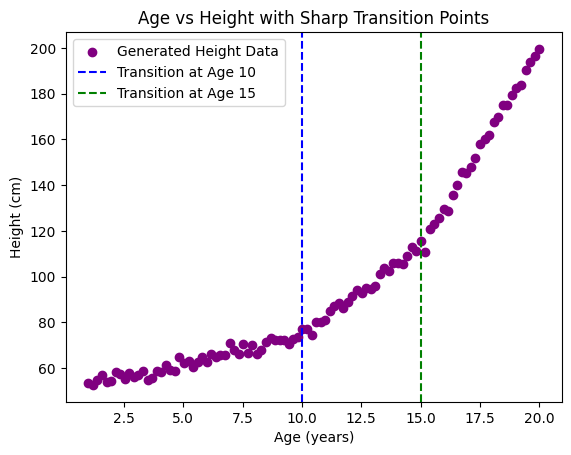

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def generate_data(num_points=100, seed=42):
    np.random.seed(seed)
    ages = np.linspace(1, 20, num_points)
    # Adding transition effects at age 10 and 15
    heights = (
        50 + 2.5 * ages
        + 5 * np.maximum(ages - 10, 0)
        + 10 * np.maximum(ages - 15, 0)
        + np.random.normal(0, 2, num_points)
    )
    return ages, heights

# Generate the age and height data
ages, heights = generate_data()

plt.scatter(age_values, height_values, color='purple', label='Generated Height Data')
plt.axvline(x=10, color='blue', linestyle='--', label='Transition at Age 10')
plt.axvline(x=15, color='green', linestyle='--', label='Transition at Age 15')
plt.xlabel("Age (years)")
plt.ylabel("Height (cm)")
plt.title("Age vs Height with Sharp Transition Points")
plt.legend()
plt.show()



# **Design Matrix and Gradient Descent Implementation**



In [ ]:


# Step 2: Implementing gradient descent to train the model
def train_with_gradient_descent(features, targets, alpha=1e-6, max_iterations=50000):
    num_samples, num_features = features.shape
    # Initialize coefficients (weights) to zeros
    coefficients = np.zeros(num_features)
    loss_history = []

    for iteration in range(max_iterations):
        # Compute predictions
        predictions = features @ coefficients

        # Calculate the residuals (errors)
        residuals = targets - predictions

        # Compute gradients using the negative gradient of SSE
        gradient_values = -2 * features.T @ residuals

        # Update coefficients using the learning rate
        coefficients -= alpha * gradient_values

        # Calculate current loss (Sum of Squared Errors)
        current_loss = np.sum(residuals ** 2)
        loss_history.append(current_loss)

        # Print every 5000 iterations
        if iteration % 5000 == 0:
            print(f'Iteration {iteration}, Loss: {current_loss:.4f}, Coefficients: {coefficients}')

        # Early stopping if NaN encountered in coefficients
        if np.any(np.isnan(coefficients)):
            print("NaN detected in coefficients.")
            break

    return coefficients, loss_history

# Step 3: Generate the age-height dataset
ages, heights = generate_data()

# Step 4: Create the feature matrix using knot points
features = create_feature_matrix(ages)

# Step 5: Train the model using gradient descent
coefficients, loss_history = train_with_gradient_descent(features, heights)



Iteration 0, Loss: 1095661.3035, Coefficients: [0.01921654 0.24443486 0.07796331 0.02323204]
Iteration 5000, Loss: 23885.8382, Coefficients: [6.22966107 7.69026443 0.34197514 4.66743017]
Iteration 10000, Loss: 17607.6561, Coefficients: [10.89019597  7.30045876 -0.35589424  7.64206176]
Iteration 15000, Loss: 13535.6598, Coefficients: [14.90709953  6.92070483 -0.65377284  9.61602115]
Iteration 20000, Loss: 10725.7633, Coefficients: [18.40639009  6.55966632 -0.69261655 10.88964648]
Iteration 25000, Loss: 8678.3765, Coefficients: [21.48131653  6.220053   -0.56335141 11.67834881]
Iteration 30000, Loss: 7121.1365, Coefficients: [24.20299776  5.90303225 -0.32892101 12.1337156 ]
Iteration 35000, Loss: 5899.2860, Coefficients: [26.62645123  5.60877418 -0.03266368 12.3621878 ]
Iteration 40000, Loss: 4920.0984, Coefficients: [28.79488253  5.33680117  0.29585338 12.43832035]
Iteration 45000, Loss: 4124.5002, Coefficients: [30.74275864  5.08622989  0.63671427 12.41416418]


# **Plotting Loss Curve and Predictions vs Actual Data**
In this section, we visualize the progress of gradient descent by plotting the loss over epochs, and we also compare the predictions made by the model to the actual data.

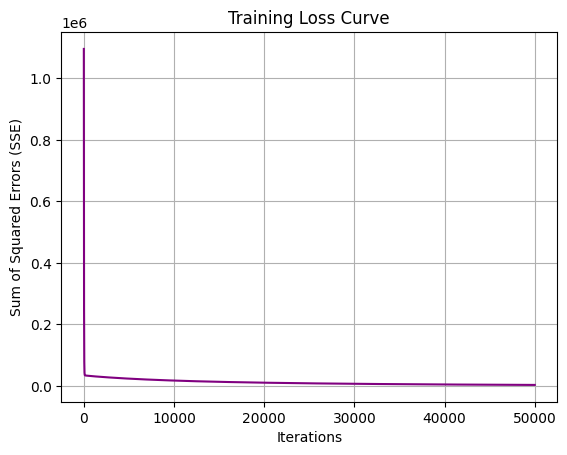

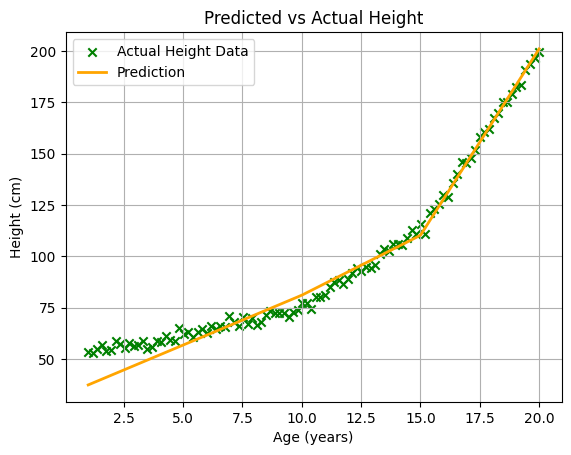

In [ ]:


# Plotting the loss curve over the training iterations
def plot_training_loss_curve(loss_history):
    plt.plot(loss_history, color='purple')
    plt.xlabel("Iterations")
    plt.ylabel("Sum of Squared Errors (SSE)")
    plt.title("Training Loss Curve")
    plt.grid(True)
    plt.show()

# Plotting model predictions against actual height values
def plot_actual_vs_predicted(ages, actual_heights, predicted_heights):
    plt.scatter(ages, actual_heights, color='green', label='Actual Height Data', marker='x')
    plt.plot(ages, predicted_heights, color='orange', label='Prediction', linewidth=2)
    plt.xlabel("Age (years)")
    plt.ylabel("Height (cm)")
    plt.title("Predicted vs Actual Height")
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the training loss curve using the modified function name and variable
plot_training_loss_curve(loss_history)

# Calculate predictions based on the learned coefficients from gradient descent
predicted_heights = features @ coefficients

# Plot the predictions versus the actual height values
plot_actual_vs_predicted(ages, heights, predicted_heights)


Coefficients from Gradient Descent: [32.49768355  4.85598204  0.97667887 12.32592458]
Coefficients from Sklearn LinearRegression: [50.04292581  2.42915913  5.28812638  9.59804587]


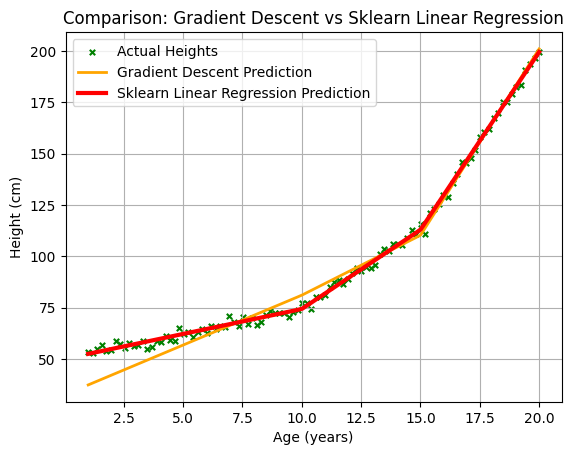

In [ ]:



# Function to compare gradient descent results with sklearn LinearRegression
def compare_with_sklearn(features, targets):
    regressor = LinearRegression(fit_intercept=False)  # No intercept; bias term is already included
    regressor.fit(features, targets)
    return regressor.coef_

# Using scikit-learn to obtain coefficients for comparison
sklearn_parameters = compare_with_sklearn(features, heights)

# Predict heights using the scikit-learn model coefficients
predicted_heights_sklearn = features @ sklearn_parameters

# Print out the coefficients from gradient descent vs sklearn
print("Coefficients from Gradient Descent:", coefficients)
print("Coefficients from Sklearn LinearRegression:", sklearn_parameters)

# Function to plot the predictions for comparison
def plot_model_comparison(ages, actual_heights, gradient_descent_predictions, sklearn_predictions):
    plt.scatter(ages, actual_heights, color='green', label='Actual Heights', s=15, marker='x')
    plt.plot(ages, gradient_descent_predictions, color='orange', label='Gradient Descent Prediction', linewidth=2)
    plt.plot(ages, sklearn_predictions, color='red', label='Sklearn Linear Regression Prediction', linewidth=3)
    plt.xlabel("Age (years)")
    plt.ylabel("Height (cm)")
    plt.title("Comparison: Gradient Descent vs Sklearn Linear Regression")
    plt.legend()
    plt.grid(True)
    plt.show()

# Plotting comparison of actual vs predicted values from both gradient descent and sklearn
plot_model_comparison(ages, heights, predicted_heights, predicted_heights_sklearn)


#**1.	Linear Regression: Provide your own Python implementation of Linear Regression following the mathematical description provided in the class.**

Write a simple data generator to generate data for age vs height showing transition points where the height increases sharply (see lecture slides).

Include knot points to model transition points into your feature modelling. Train your model in the synthetic data you have generated.

Plot loss curves against training epochs. Plot your model prediction against ground truth data.

Compare your model output against sklearn implementation of linear regression.


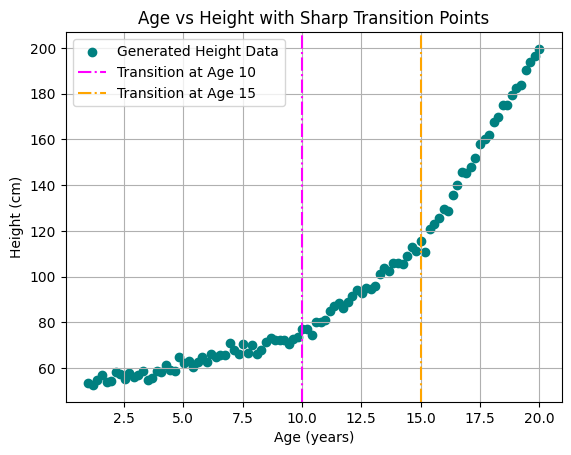

Iteration 0, Loss: 1095661.3035, Weights: [0.01921654 0.24443486 0.07796331 0.02323204]
Iteration 5000, Loss: 23885.8382, Weights: [6.22966107 7.69026443 0.34197514 4.66743017]
Iteration 10000, Loss: 17607.6561, Weights: [10.89019597  7.30045876 -0.35589424  7.64206176]
Iteration 15000, Loss: 13535.6598, Weights: [14.90709953  6.92070483 -0.65377284  9.61602115]
Iteration 20000, Loss: 10725.7633, Weights: [18.40639009  6.55966632 -0.69261655 10.88964648]
Iteration 25000, Loss: 8678.3765, Weights: [21.48131653  6.220053   -0.56335141 11.67834881]
Iteration 30000, Loss: 7121.1365, Weights: [24.20299776  5.90303225 -0.32892101 12.1337156 ]
Iteration 35000, Loss: 5899.2860, Weights: [26.62645123  5.60877418 -0.03266368 12.3621878 ]
Iteration 40000, Loss: 4920.0984, Weights: [28.79488253  5.33680117  0.29585338 12.43832035]
Iteration 45000, Loss: 4124.5002, Weights: [30.74275864  5.08622989  0.63671427 12.41416418]


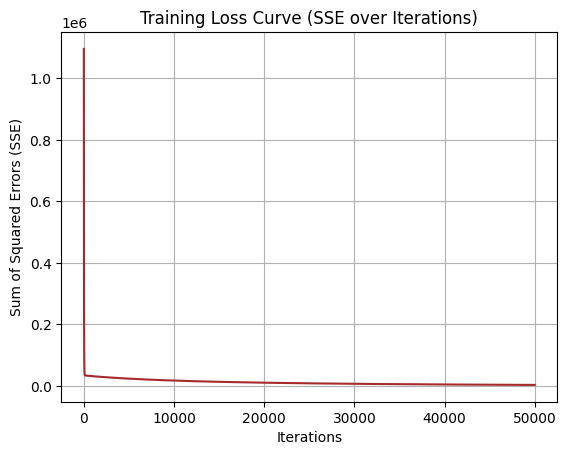

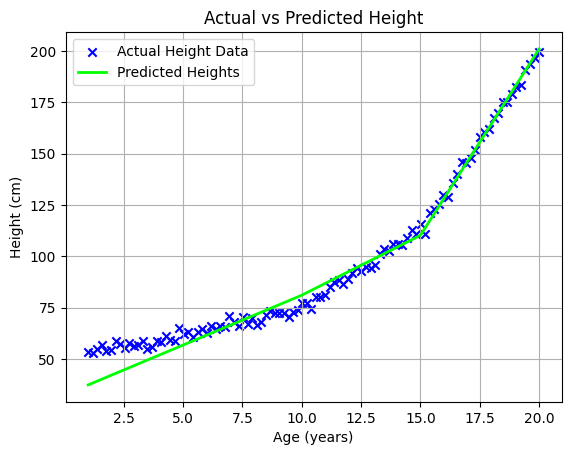

Gradient Descent Weights: [32.49768355  4.85598204  0.97667887 12.32592458]
Sklearn LinearRegression Weights: [50.04292581  2.42915913  5.28812638  9.59804587]


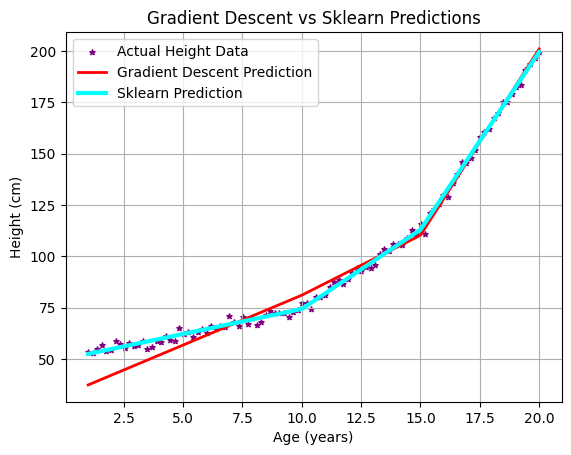

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Generate the synthetic dataset for age and height
def create_age_height_data(num_samples=100, seed_value=42):
    np.random.seed(seed_value)
    age_data = np.linspace(1, 20, num_samples)
    height_data = (
        50 + 2.5 * age_data
        + 5 * np.maximum(age_data - 10, 0)
        + 10 * np.maximum(age_data - 15, 0)
        + np.random.normal(0, 2, num_samples)
    )
    return age_data, height_data

# Generate data
age_data, height_data = create_age_height_data()

# Plot Age vs Height data with transition points
plt.scatter(age_data, height_data, color='teal', label='Generated Height Data', marker='o')
plt.axvline(x=10, color='magenta', linestyle='-.', label='Transition at Age 10')
plt.axvline(x=15, color='orange', linestyle='-.', label='Transition at Age 15')
plt.xlabel("Age (years)")
plt.ylabel("Height (cm)")
plt.title("Age vs Height with Sharp Transition Points")
plt.legend()
plt.grid(True)
plt.show()

# Step 2: Create the design matrix including knot points at ages 10 and 15
def create_feature_matrix(age_data):
    num_samples = len(age_data)
    design_matrix = np.ones((num_samples, 4))
    design_matrix[:, 1] = age_data
    design_matrix[:, 2] = np.maximum(age_data - 10, 0)
    design_matrix[:, 3] = np.maximum(age_data - 15, 0)
    return design_matrix

# Step 3: Implementing Gradient Descent to train the model
def gradient_descent_optimizer(features, targets, learning_rate=1e-6, iterations=50000):
    num_samples, num_features = features.shape
    weights = np.zeros(num_features)
    loss_values = []

    for i in range(iterations):
        predictions = features @ weights
        residuals = targets - predictions
        gradients = -2 * features.T @ residuals
        weights -= learning_rate * gradients
        loss = np.sum(residuals ** 2)
        loss_values.append(loss)

        if i % 5000 == 0:
            print(f'Iteration {i}, Loss: {loss:.4f}, Weights: {weights}')

        if np.any(np.isnan(weights)):
            print("NaN detected in weights. Stopping early.")
            break

    return weights, loss_values

# Step 4: Create the feature matrix
features_matrix = create_feature_matrix(age_data)

# Step 5: Train the model using gradient descent
weights, loss_values = gradient_descent_optimizer(features_matrix, height_data)

# Step 6: Plot the loss curve over the training iterations
def plot_loss_curve(loss_values):
    plt.plot(loss_values, color='brown')
    plt.xlabel("Iterations")
    plt.ylabel("Sum of Squared Errors (SSE)")
    plt.title("Training Loss Curve (SSE over Iterations)")
    plt.grid(True)
    plt.show()

plot_loss_curve(loss_values)

# Step 7: Plotting model predictions against actual height values
def plot_height_predictions(age_data, actual_height, model_predictions):
    plt.scatter(age_data, actual_height, color='blue', label='Actual Height Data', marker='x')
    plt.plot(age_data, model_predictions, color='lime', label='Predicted Heights', linewidth=2)
    plt.xlabel("Age (years)")
    plt.ylabel("Height (cm)")
    plt.title("Actual vs Predicted Height")
    plt.legend()
    plt.grid(True)
    plt.show()

# Calculate predictions based on the trained model
predicted_heights = features_matrix @ weights

# Plot the predictions vs actual data
plot_height_predictions(age_data, height_data, predicted_heights)

# Step 8: Compare the results with sklearn Linear Regression
def compare_sklearn(features, targets):
    lr_model = LinearRegression(fit_intercept=False)
    lr_model.fit(features, targets)
    return lr_model.coef_

# Obtain coefficients using sklearn for comparison
sklearn_weights = compare_sklearn(features_matrix, height_data)

# Predict heights using sklearn model coefficients
predicted_heights_sklearn = features_matrix @ sklearn_weights

# Print out coefficients comparison
print("Gradient Descent Weights:", weights)
print("Sklearn LinearRegression Weights:", sklearn_weights)

# Step 9: Plot comparison between gradient descent and sklearn predictions
def plot_comparison(age_data, actual_height, gd_predictions, sklearn_predictions):
    plt.scatter(age_data, actual_height, color='purple', label='Actual Height Data', marker='*', s=15)
    plt.plot(age_data, gd_predictions, color='red', label='Gradient Descent Prediction', linewidth=2)
    plt.plot(age_data, sklearn_predictions, color='cyan', label='Sklearn Prediction', linewidth=3)
    plt.xlabel("Age (years)")
    plt.ylabel("Height (cm)")
    plt.title("Gradient Descent vs Sklearn Predictions")
    plt.legend()
    plt.grid(True)
    plt.show()

# Plotting the comparison between gradient descent and sklearn predictions
plot_comparison(age_data, height_data, predicted_heights, predicted_heights_sklearn)


# **2.	Regularization: Provide your own Python implementation of Ridge Regression following the mathematical description provided in the class.**

For the age vs height data from 1. Apply your ridge regression code to automatically eliminate features that are not highly relevant.

Compare your model output against sklearn implementation of ridge linear regression.


# **Implement Ridge Regression**


Ridge Regression Coefficients: [45.61454837  3.01490748  4.38814299  9.91096685]


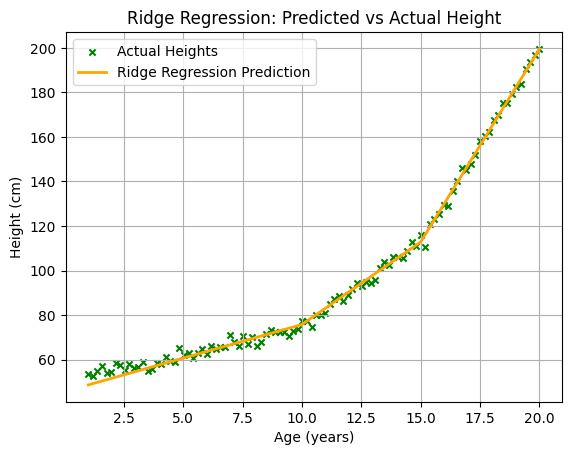

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

# Step 1: Generate synthetic age and height data with transition points
def create_data(samples=100, seed=42):
    np.random.seed(seed)
    age_values = np.linspace(1, 20, samples)
    # Heights include sharp transitions at ages 10 and 15
    height_values = (
        50 + 2.5 * age_values
        + 5 * np.maximum(age_values - 10, 0)
        + 10 * np.maximum(age_values - 15, 0)
        + np.random.normal(0, 2, samples)
    )
    return age_values, height_values

# Step 2: Create the design matrix for Ridge Regression (including knot points)
def create_feature_matrix(age_values):
    num_samples = len(age_values)
    feature_matrix = np.ones((num_samples, 4))  # Columns for [bias, age, (age-10)+, (age-15)+]
    feature_matrix[:, 1] = age_values
    feature_matrix[:, 2] = np.maximum(age_values - 10, 0)
    feature_matrix[:, 3] = np.maximum(age_values - 15, 0)
    return feature_matrix

# Step 3: Implement Ridge Regression using Closed-Form Solution
def train_ridge_regression(features, targets, regularization_param):
    num_features = features.shape[1]
    # Create the identity matrix for regularization, with bias term unregularized
    identity = np.eye(num_features)
    theta_ridge = np.linalg.inv(features.T @ features + regularization_param * identity) @ (features.T @ targets)
    return theta_ridge

# Step 4: Generate data
age_values, height_values = create_data()

# Step 5: Create feature matrix using knot points
features_matrix = create_feature_matrix(age_values)

# Step 6: Train the Ridge Regression model
lambda_value = 1.0  # Regularization parameter
ridge_coefficients = train_ridge_regression(features_matrix, height_values, lambda_value)

# Step 7: Predict heights using the learned coefficients
predicted_heights = features_matrix @ ridge_coefficients

# Print the Ridge Regression coefficients
print("Ridge Regression Coefficients:", ridge_coefficients)

# Step 8: Plotting the actual height data and the Ridge Regression predictions
def plot_ridge_predictions(age_values, actual_heights, predicted_heights):
    plt.scatter(age_values, actual_heights, color='green', label='Actual Heights', s=20, marker='x')
    plt.plot(age_values, predicted_heights, color='orange', label='Ridge Regression Prediction', linewidth=2)
    plt.xlabel("Age (years)")
    plt.ylabel("Height (cm)")
    plt.title("Ridge Regression: Predicted vs Actual Height")
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the results of Ridge Regression predictions
plot_ridge_predictions(age_values, height_values, predicted_heights)


Ridge Regression Coefficients for λ=0.01: [49.99402939  2.43565493  5.27799078  9.60189698]


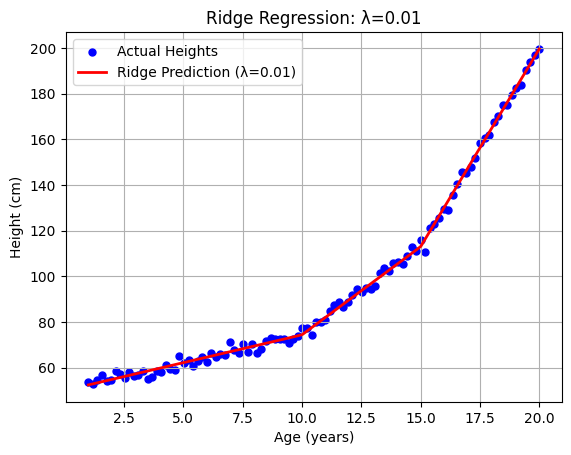

Ridge Regression Coefficients for λ=0.1: [49.55855564  2.49348071  5.1879063   9.63582845]


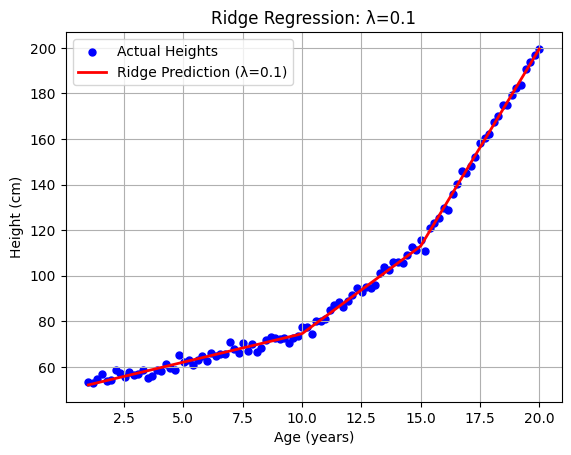

Ridge Regression Coefficients for λ=0.5: [47.71806833  2.73733874  4.81095254  9.77168989]


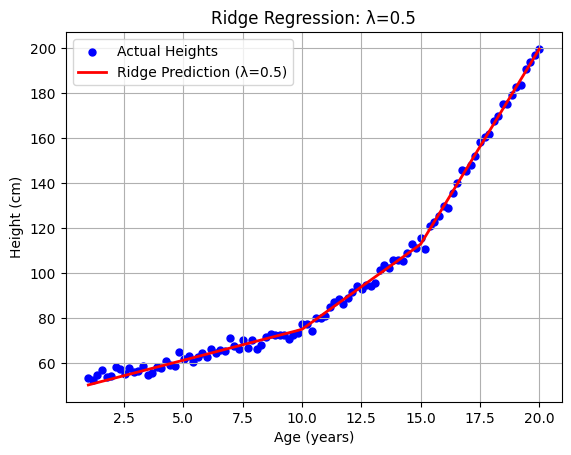

Ridge Regression Coefficients for λ=1.0: [45.61454837  3.01490748  4.38814299  9.91096685]


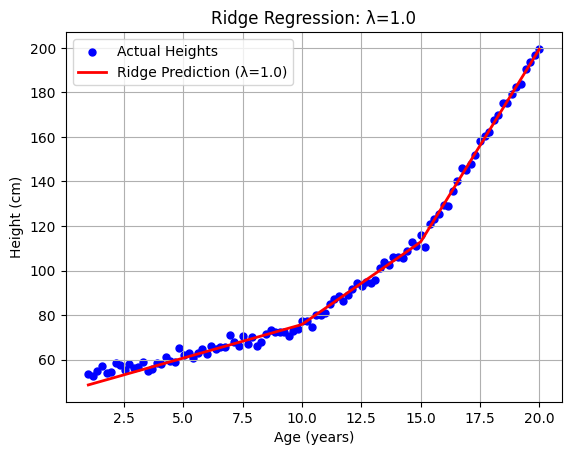

Ridge Regression Coefficients for λ=5.0: [33.97685543  4.52168902  2.25083769 10.27924603]


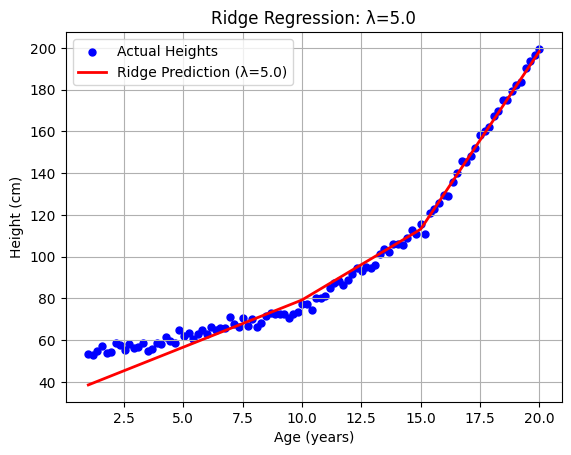

Ridge Regression Coefficients for λ=10.0: [26.05113439  5.50569255  1.08693104  9.95101586]


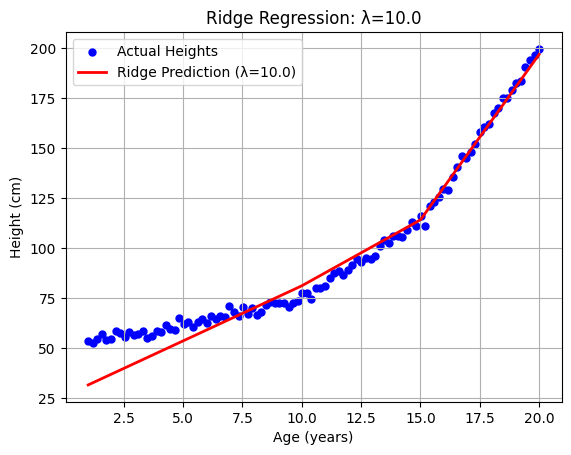

In [ ]:
# Set regularization parameter to explore its effect
lambda_values = [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]  # Different lambda values to test

# Iterate over each lambda value to train Ridge Regression and visualize the results
for lambda_value in lambda_values:
    # Step 1: Train custom Ridge Regression for each lambda value
    ridge_coefficients = train_ridge_regression(features_matrix, height_values, lambda_value)

    # Step 2: Predict heights using the learned coefficients
    predicted_heights_ridge = features_matrix @ ridge_coefficients

    # Step 3: Print the Ridge Regression coefficients for the current lambda value
    print(f"Ridge Regression Coefficients for λ={lambda_value}:", ridge_coefficients)

    # Step 4: Plot Age vs Height and Ridge Regression Predictions for each λ
    def plot_ridge_lambda_effect(age_values, actual_heights, predicted_heights, lambda_value):
        plt.scatter(age_values, actual_heights, color='blue', label='Actual Heights', s=25, marker='o')
        plt.plot(age_values, predicted_heights, color='red', label=f'Ridge Prediction (λ={lambda_value})', linewidth=2)
        plt.xlabel("Age (years)")
        plt.ylabel("Height (cm)")
        plt.title(f"Ridge Regression: λ={lambda_value}")
        plt.legend()
        plt.grid(True)
        plt.show()

    # Step 5: Call the function to plot Ridge Regression predictions for each λ value
    plot_ridge_lambda_effect(age_values, height_values, predicted_heights_ridge, lambda_value)


# **Compare with Sklearn's Ridge Regression**


Custom Ridge Regression Weights: [26.05113439  5.50569255  1.08693104  9.95101586]
Sklearn Ridge Regression Weights: [26.05113439  5.50569255  1.08693104  9.95101586]


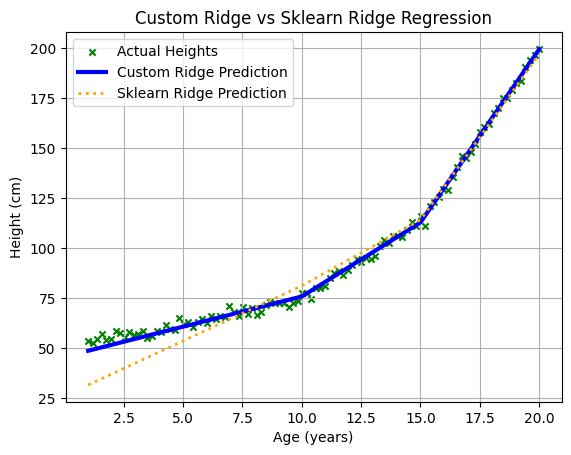

In [ ]:

from sklearn.linear_model import Ridge

# Step 1: Compare Ridge Regression coefficients with Sklearn's Ridge implementation
def compare_with_sklearn_ridge(features, targets, alpha_value):
    ridge_model = Ridge(alpha=alpha_value, fit_intercept=False)  # fit_intercept=False because bias is included in design matrix
    ridge_model.fit(features, targets)
    return ridge_model.coef_

# Step 2: Use sklearn Ridge for comparison
sklearn_ridge_weights = compare_with_sklearn_ridge(features_matrix, height_values, lambda_value)

# Step 3: Predict heights using sklearn coefficients
predicted_heights_sklearn = features_matrix @ sklearn_ridge_weights

# Step 4: Print the coefficients for both models for comparison
print("Custom Ridge Regression Weights:", ridge_coefficients)
print("Sklearn Ridge Regression Weights:", sklearn_ridge_weights)

# Step 5: Plotting function to compare predictions from custom and sklearn Ridge Regression models
def plot_ridge_comparison(age_data, actual_heights, custom_ridge_predictions, sklearn_predictions):
    plt.scatter(age_data, actual_heights, color='green', label='Actual Heights', s=20, marker='x')
    plt.plot(age_data, custom_ridge_predictions, color='blue', label='Custom Ridge Prediction', linewidth=3)
    plt.plot(age_data, sklearn_predictions, color='orange', linestyle=':', label='Sklearn Ridge Prediction', linewidth=2)
    plt.xlabel("Age (years)")
    plt.ylabel("Height (cm)")
    plt.title("Custom Ridge vs Sklearn Ridge Regression")
    plt.legend()
    plt.grid(True)
    plt.show()

# Step 6: Call the function to plot and compare predictions
plot_ridge_comparison(age_values, height_values, predicted_heights, predicted_heights_sklearn)


# **3.	Lasso regression: Use sklearn implementation of lasso regression on cancer dataset from HTF (Elements of Statistical Learning) book.**



# **Data Loading and Preprocessing:**

The dataset is loaded from the pros.dat.txt file.
The target variable (lpsa) is separated from the rest of the features (X).
Data is split into training and test sets using an 80-20 split.




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Load the dataset (pros.dat.txt)
data = pd.read_csv('pros.dat.txt', sep=" ")

# Separating features (X) and target variable (y)
X = data.drop(columns='lpsa')  # Dropping the target column 'lpsa'
y = data['lpsa']


Lasso Regression Coefficients: [ 0.55429963  0.18014342 -0.          0.          0.20130566  0.
  0.          0.        ]


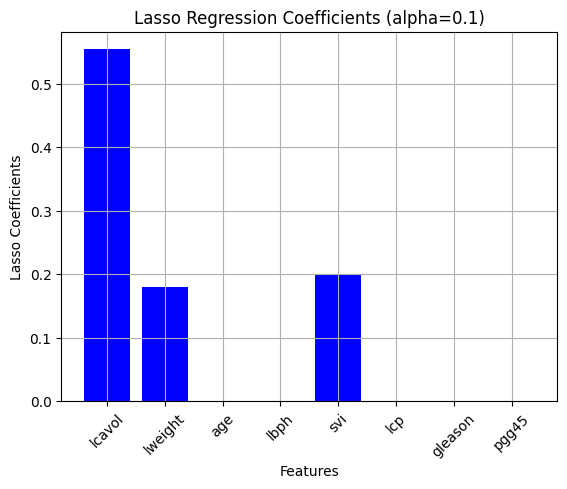

R^2 Score on Test Set: 0.69


In [ ]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Apply Lasso Regression
alpha_value = 0.1  # Regularization strength
lasso_model = Lasso(alpha=alpha_value)
lasso_model.fit(X_train_scaled, y_train)

#Get and print Lasso coefficients
lasso_coefficients = lasso_model.coef_
print("Lasso Regression Coefficients:", lasso_coefficients)

#Predict on test data
y_pred = lasso_model.predict(X_test_scaled)

#Plot feature importance (i.e., Lasso coefficients)
plt.bar(X.columns, lasso_coefficients, color='blue')
plt.xlabel("Features")
plt.ylabel("Lasso Coefficients")
plt.title(f"Lasso Regression Coefficients (alpha={alpha_value})")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#Model Evaluation
# Calculate R^2 score to evaluate the model
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score on Test Set: {r2:.2f}")


Converged at iteration 15
Custom Lasso Regression Coefficients: [ 0.66025171  0.26464234 -0.15587735  0.13883036  0.3122482  -0.14407613
  0.03484206  0.12376431]
R^2 Score on Training Data (Custom Lasso): 0.66


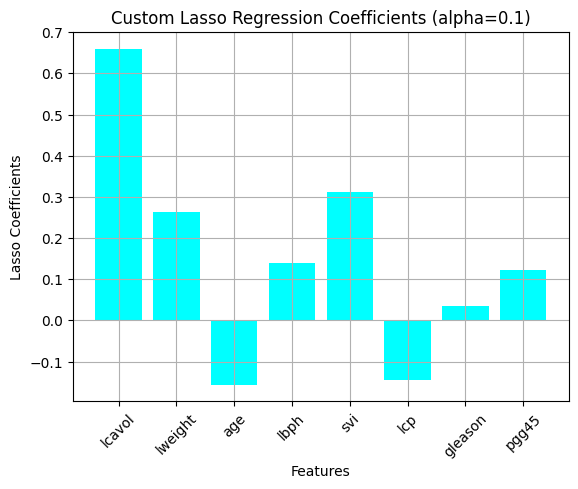

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Coordinate Descent Implementation for Lasso Regression
def lasso_coordinate_descent(X, y, alpha, iterations=1000, tolerance=1e-4):
    """
    Implements Lasso Regression using coordinate descent to minimize the objective function.

    Parameters:
    X (ndarray): Feature matrix (m x n)
    y (ndarray): Target variable (m,)
    alpha (float): Regularization parameter (L1 strength)
    iterations (int): Number of iterations for convergence
    tolerance (float): Convergence threshold

    Returns:
    ndarray: Learned coefficients (n,)
    """
    m, n = X.shape
    theta = np.zeros(n)
    y_mean = np.mean(y)
    y = y - y_mean  # Centering the target variable

    for it in range(iterations):
        theta_prev = np.copy(theta)

        # Update each coefficient using coordinate descent
        for j in range(n):
            # Compute residual by excluding the effect of feature j
            residual = y - X @ theta + theta[j] * X[:, j]
            rho_j = X[:, j].T @ residual

            # Update rule with soft-thresholding for L1 penalty
            if rho_j < -alpha / 2:
                theta[j] = (rho_j + alpha / 2) / (X[:, j] @ X[:, j])
            elif rho_j > alpha / 2:
                theta[j] = (rho_j - alpha / 2) / (X[:, j] @ X[:, j])
            else:
                theta[j] = 0

        # Check for convergence
        if np.sum(np.abs(theta - theta_prev)) < tolerance:
            print(f'Converged at iteration {it}')
            break

    return theta

#Prepare the data
X = data.drop(columns=['lpsa']).values  # Convert features to NumPy array
y = data['lpsa'].values  # Convert target to NumPy array

#Feature Scaling (Standardize)
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

#Train Lasso Model using Coordinate Descent
alpha_value = 0.1
custom_lasso_weights = lasso_coordinate_descent(X, y, alpha_value)

#Print Coefficients
print("Custom Lasso Regression Coefficients:", custom_lasso_weights)

# Predict on Training Data (since there is no test split)
y_pred_custom = X @ custom_lasso_weights + np.mean(data['lpsa'])

# Model Evaluation using R^2 Score
from sklearn.metrics import r2_score
r2_custom = r2_score(y, y_pred_custom)
print(f"R^2 Score on Training Data (Custom Lasso): {r2_custom:.2f}")

# Plot Feature Importance
plt.bar(column_names[:-1], custom_lasso_weights, color='cyan')
plt.xlabel("Features")
plt.ylabel("Lasso Coefficients")
plt.title(f"Custom Lasso Regression Coefficients (alpha={alpha_value})")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


#**4.	Multi-class logistic regression: Provide your own working implementation of multiclass logistic regression.**

Show it working on your choice of dataset that you can download from the internet. Choose a dataset that has at least 1000 rows.

Compare your results with skearn implementation.

#**1. Load and Preprocess the Data**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Load the dataset
data = pd.read_csv('winequalityred.csv', sep=';')

# Features and target
X = data.drop('quality', axis=1).values
y = data['quality'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


##Step 2: Implement Multiclass Logistic Regression from Scratch##



In [ ]:
class MulticlassLogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def softmax(self, z):
        # Stable softmax to avoid overflow issues
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))

        # One-hot encode the labels
        y_encoded = np.zeros((n_samples, n_classes))
        y_encoded[np.arange(n_samples), y - np.min(y)] = 1

        # Initialize weights and bias
        self.weights = np.zeros((n_features, n_classes))
        self.bias = np.zeros((1, n_classes))

        # Gradient descent
        for _ in range(self.epochs):
            # Linear model prediction
            z = np.dot(X, self.weights) + self.bias
            y_pred = self.softmax(z)

            # Compute the gradient
            dw = np.dot(X.T, (y_pred - y_encoded)) / n_samples
            db = np.sum(y_pred - y_encoded, axis=0) / n_samples

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self.softmax(z)
        return np.argmax(y_pred, axis=1) + np.min(y)

# Train our custom model
custom_model = MulticlassLogisticRegression(learning_rate=0.1, epochs=5000)
custom_model.fit(X_train, y_train)
y_pred_custom = custom_model.predict(X_test)

# Evaluate Accuracy of Custom Implementation
accuracy_custom = accuracy_score(y_test, y_pred_custom)
print(f"Accuracy of custom multiclass logistic regression: {accuracy_custom:.2f}")


Accuracy of custom multiclass logistic regression: 0.57


##Step 3: Use Scikit-Learn’s Logistic Regression##

In [ ]:
# Train Scikit-Learn's Logistic Regression Model
sklearn_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=5000)
sklearn_model.fit(X_train, y_train)
y_pred_sklearn = sklearn_model.predict(X_test)

# Evaluate Accuracy of Scikit-Learn Model
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"Accuracy of scikit-learn logistic regression: {accuracy_sklearn:.2f}")


Accuracy of scikit-learn logistic regression: 0.57


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


##Step 4: Compare Results##

In [ ]:
print("Comparison of Accuracy:")
print(f"Custom Multiclass Logistic Regression Accuracy: {accuracy_custom:.2f}")
print(f"Scikit-learn Logistic Regression Accuracy: {accuracy_sklearn:.2f}")


Comparison of Accuracy:
Custom Multiclass Logistic Regression Accuracy: 0.57
Scikit-learn Logistic Regression Accuracy: 0.57


#**5.	PCA (Principal Components Analysis): Use sklearn implementation of PCA on eigen faces dataset. Provide explanation for each of the steps.**


# **Step 1: Import Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people
from sklearn.preprocessing import StandardScaler


# **Step 2: Load and preprocess the Dataset**
We use fetch_lfw_people to load the dataset.

lfw_people.data gives us the data in a format where each row is an image.

We determine the number of samples, image dimensions, number of features, and the number of classes (people).

In [ ]:
# Load the LFW dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# Get data, images, and labels
X = lfw_people.data
n_samples, h, w = lfw_people.images.shape

# Number of features (each pixel is a feature)
n_features = X.shape[1]

# Number of target classes (different people in the dataset)
n_classes = lfw_people.target_names.shape[0]

print(f"Number of samples: {n_samples}")
print(f"Height of each image: {h}, Width: {w}")
print(f"Number of features: {n_features}")
print(f"Number of unique faces (classes): {n_classes}")


Number of samples: 1288
Height of each image: 50, Width: 37
Number of features: 1850
Number of unique faces (classes): 7


# **Step 3: Standardize the Data**
We standardize the data to have a mean of 0 and a standard deviation of 1, which is crucial before applying PCA.

This scaling helps PCA treat all features equally and improves convergence.

In [ ]:
# Standardize the data before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Shape of standardized data: {X_scaled.shape}")


Shape of standardized data: (1288, 1850)


# **Step 4: Apply PCA to reduce dimensionality**
We set n_components to 150. This means we want to reduce the original number of features to 150 components.

The whiten=True parameter ensures that the resulting components have unit variance.

The transformed data X_pca now has dimensions (n_samples, 150)

In [ ]:
# Reduce to 150 principal components
n_components = 150
pca = PCA(n_components=n_components, whiten=True, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print(f"Shape after PCA transformation: {X_pca.shape}")


Shape after PCA transformation: (1288, 150)


# **Step 5: Visualize the Principal components(Eigen faces)**
We define plot_gallery() to display the principal components.

We reshape each principal component (pca.components_) to match the image dimensions and plot the top 15 components.

These eigenfaces represent the main features that capture variance in the data.

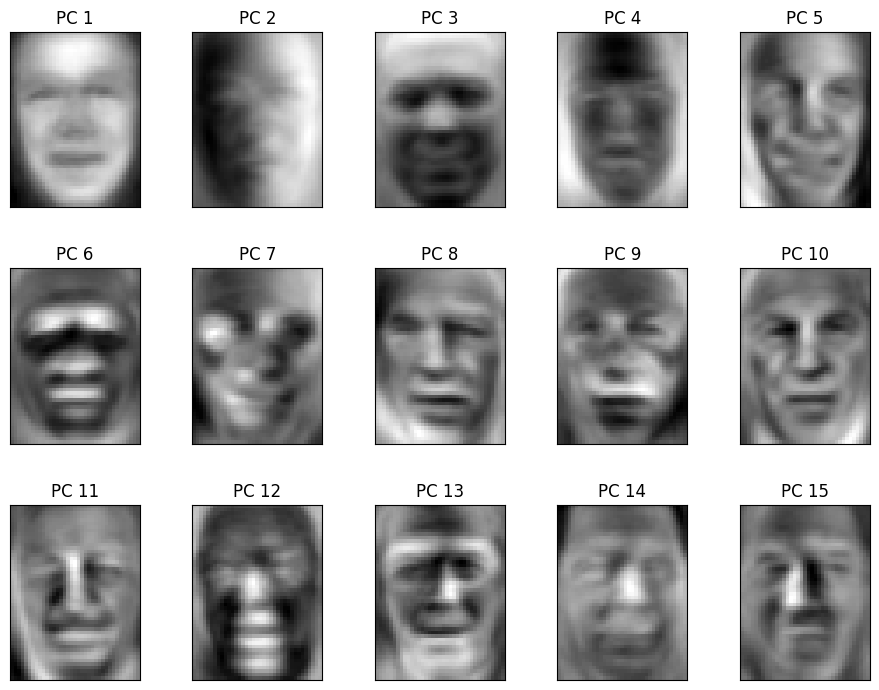

In [ ]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=5):
    """Helper function to plot the images"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

# Visualize the top 15 eigenfaces (principal components)
eigenfaces = pca.components_.reshape((n_components, h, w))
plot_gallery(eigenfaces, [f"PC {i + 1}" for i in range(15)], h, w)

plt.show()


# **Step 6: Explained variance ratio**
The explained variance ratio indicates how much variance each principal component captures.

We plot the cumulative explained variance to see how much variance is retained as we add more components.

This plot helps us understand how effective the dimensionality reduction is. You can observe how many components are needed to retain, for example, 90% of the variance.

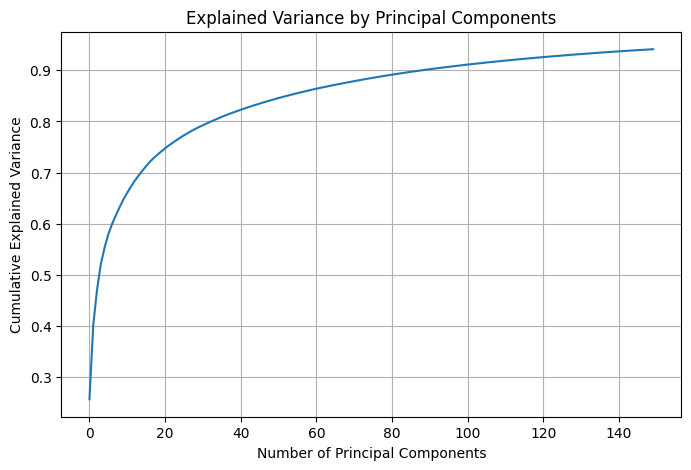

In [ ]:
# Plot the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid()
plt.show()


# **Step 7: Reconstructing the Images**

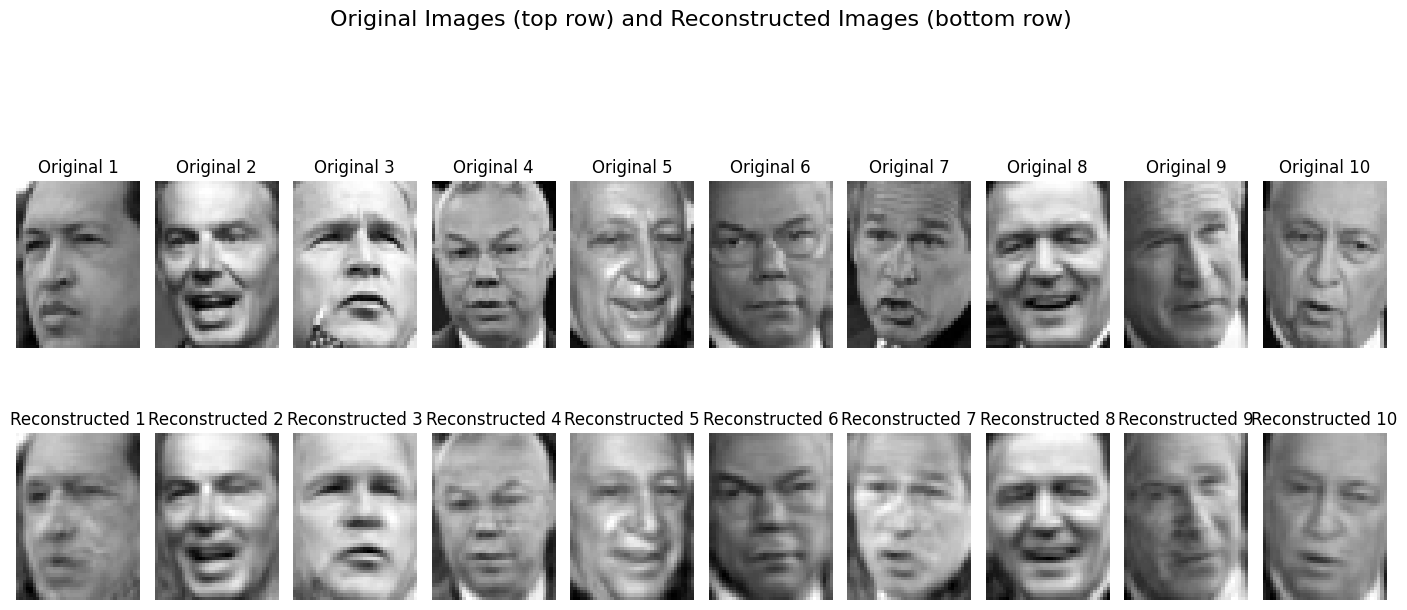

In [ ]:
# Reconstruct the images from PCA components
X_reconstructed = pca.inverse_transform(X_pca)  # Project data back to original space
X_reconstructed = scaler.inverse_transform(X_reconstructed)  # Undo the standard scaling

# Create a new figure for visualizing the original and reconstructed images
plt.figure(figsize=(14, 7))

# Loop through a subset of images for visualization
for i in range(10):
    # Original images (top row)
    ax_original = plt.subplot(2, 10, i + 1)
    ax_original.imshow(X[i].reshape(h, w), cmap='gray')
    ax_original.set_title(f"Original {i+1}")
    ax_original.axis('off')

    # Reconstructed images (bottom row)
    ax_reconstructed = plt.subplot(2, 10, i + 11)
    ax_reconstructed.imshow(X_reconstructed[i].reshape(h, w), cmap='gray')
    ax_reconstructed.set_title(f"Reconstructed {i+1}")
    ax_reconstructed.axis('off')

plt.suptitle('Original Images (top row) and Reconstructed Images (bottom row)', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()
